# Python Plotting - An Introduction

## Introduction
This notebook takes you through many different types of plot you'll come across in the atmospheric sciences. We'll use real climate data and some model output where appropriate.

You'll need to download the BEST dataset - on a Linux machine this can be done straightforwardly by running `wget http://berkeleyearth.lbl.gov/auto/Global/Gridded/Land_and_Ocean_LatLong1.nc` in the `data` folder.

Please send any comments or suggestions to dcw32.wade - at - gmail.com.


In [22]:
#Import all the packages we need now! This will take a while
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pylab as plt
import math as m
from netCDF4 import Dataset
#Specific packages
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import scipy.ndimage as ndimage

## Scatter plots and errorbars with Farman et al 1985

In this section we will plot the October mean ozone from 1957 to 1984. This long-term record of column ozone allowed for the detection of the ozone hole over Antarctica. The strong springtime depletion supported the role of heterogenous chemisty.

In [2]:
#Read in all the files
#These have been digitised from the original figure
loc='data/'
farman1=np.genfromtxt(loc+'farman_o32.csv',delimiter=',',skip_header=1)
farman2=np.genfromtxt(loc+'farman_f11.csv',delimiter=',',skip_header=1)
farman3=np.genfromtxt(loc+'farman_f12.csv',delimiter=',',skip_header=1)

In [3]:
#Take an example to print
print farman1
print farman1.shape

[[ 1957.    329.9   345.2   314.7]
 [ 1958.    314.    329.2   298.6]
 [ 1959.    311.1   326.2   295.5]
 [ 1960.    301.    316.3   285.7]
 [ 1961.    316.9   332.2   301.8]
 [ 1962.    331.9   350.    316.8]
 [ 1963.    308.9   324.2   293.4]
 [ 1964.    317.9   333.1   302.7]
 [ 1965.    280.7   295.9   265.4]
 [ 1966.    316.    331.1   300.7]
 [ 1967.    323.    338.3   307.6]
 [ 1968.    300.9   316.2   285.7]
 [ 1969.    281.8   297.    266.5]
 [ 1970.    281.8   297.    266.5]
 [ 1971.    298.9   314.2   283.7]
 [ 1972.    304.    319.2   288.7]
 [ 1973.    288.9   304.3   273.5]
 [ 1975.    308.1   323.4   292.6]
 [ 1976.    282.9   298.1   267.6]
 [ 1977.    250.7   266.1   235.6]
 [ 1978.    283.8   299.3   268.6]
 [ 1979.    260.9   276.1   245.7]
 [ 1980.    225.9   241.    210.9]
 [ 1981.    246.8   262.    231.6]
 [ 1982.    238.    252.9   222.8]
 [ 1983.    207.1   222.1   191.7]
 [ 1984.    195.7   211.1   180.8]]
(27, 4)


In [4]:
#Ozone data
o3_t=farman1[:,0]
o3_mu=farman1[:,1] #DU
o3_up=farman1[:,2] #DU
o3_lo=farman1[:,3] #DU
#F-11 data
f11_t=farman2[:,0]
f11_val=farman2[:,1] #pptv
#F-12 data
f12_t=farman3[:,0]
f12_val=farman3[:,1] #pptv

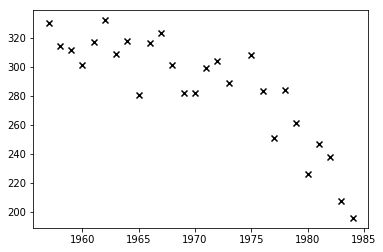

In [5]:
#Rough and ready plot
plt.scatter(o3_t,o3_mu,marker='x',c='k')
plt.show()

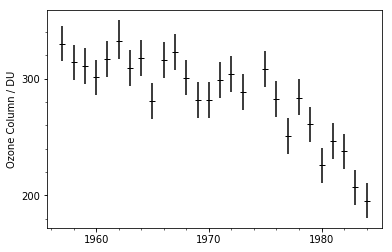

In [6]:
#Now we want to include the upper and lower values on our plot
fig,ax=plt.subplots()
#better to create an axis object, then plot to that - makes things
#easier when you want to plot multiple things on the same graph!
ax.errorbar(o3_t,o3_mu,yerr=[o3_mu-o3_lo,o3_up-o3_mu],fmt='_',c='k',capthick=0)
#Same ticks as the Farman plot:
#Sets major xticks to given values
ax.set_xticks([1960,1970,1980])
#Sets minor xticks every 2 years
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.set_yticks([200,300])
#Sets ylabel
ax.set_ylabel('Ozone Column / DU')
ax.yaxis.set_minor_locator(ticker.MultipleLocator(20))
plt.show()

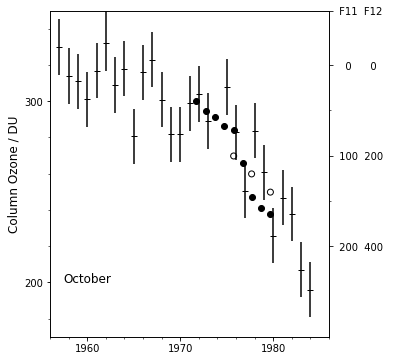

In [7]:
#def make_patch_spines_invisible(ax):
#    ax.set_frame_on(True)
#    ax.patch.set_visible(False)
#    for sp in ax.spines.values():
#        sp.set_visible(False)
# To include the F-11, F-12 values, we need to do it slightly differently:
#ax = host_subplot(111, axes_class=AA.Axes)
fig,ax=plt.subplots(figsize=(5,6))
#Now want to create a second axis
ax1 = ax.twinx() #Share x axis with the ozone
#
#Plot as before
ax.errorbar(o3_t,o3_mu,yerr=[o3_mu-o3_lo,o3_up-o3_mu],fmt='_',c='k',capthick=0)
#Now plot the scatter data
ax1.scatter(f11_t,f11_val,c='k',marker='o')
ax1.scatter(f12_t,f12_val/2.,facecolors='none', edgecolors='k',marker='o')
#
ax.set_xticks([1960,1970,1980])
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.set_yticks([200,300])
ax.yaxis.set_minor_locator(ticker.MultipleLocator(20))
#Note that matm cm in the orginal paper is identical to the Dobson unit
ax.set_ylabel('Column Ozone / DU',fontsize=12)
#Xlims
ax.set_xlim(1956,1986)
ax.set_ylim(170.,350.)
#Reverse y axis
ax1.set_ylim(300,-60)
ax1.set_yticks([-60,0,100,200])
ax1.set_yticks([50,150],minor=True)
ax1.set_yticklabels(["F11".center(5)+"F12".center(5),
                     "0".center(7)+"0".center(7),
                     "100".center(5)+"200".center(5),
                     "200".center(5)+"400".center(5)
                     ])
#Write October on the plot in the bottom left corner
ax.annotate('October',xy=(1960,200),horizontalalignment='center',fontsize=12)
plt.savefig('/homes/dcw32/figures/farman.png',bbox_inches='tight',dpi=200)
plt.show()

In [8]:
%%bash
echo "hello from $BASH"

hello from /bin/bash


## Line and bar charts with the NAO index

In [9]:
#
#Extract the NAO data
nao_data=np.genfromtxt('data/nao.dat',skip_header=4)[:192,:] #No 2017 as incomplete
print nao_data.shape
print nao_data[:,0]#Calendar years
#
#For the NAO index we want the DJF (December, January, February averages)
#Remove the first year (as only taking December) using [1:,0] meanining index 1 onwards
years=nao_data[1:,0]
#
#Initialize
nao_djf=np.zeros(len(years))
# Take the December of the previous year [i] then the January and February of the current year [i+1] and average
# Note that `years` doesn't include the first year, hence the offset of i and i+1 (would otherwise be i-1 and i)
for i in range(len(years)):
    nao_djf[i]=np.mean([nao_data[i,12],nao_data[i+1,1],nao_data[i+1,2]])

(192, 14)
[ 1825.  1826.  1827.  1828.  1829.  1830.  1831.  1832.  1833.  1834.
  1835.  1836.  1837.  1838.  1839.  1840.  1841.  1842.  1843.  1844.
  1845.  1846.  1847.  1848.  1849.  1850.  1851.  1852.  1853.  1854.
  1855.  1856.  1857.  1858.  1859.  1860.  1861.  1862.  1863.  1864.
  1865.  1866.  1867.  1868.  1869.  1870.  1871.  1872.  1873.  1874.
  1875.  1876.  1877.  1878.  1879.  1880.  1881.  1882.  1883.  1884.
  1885.  1886.  1887.  1888.  1889.  1890.  1891.  1892.  1893.  1894.
  1895.  1896.  1897.  1898.  1899.  1900.  1901.  1902.  1903.  1904.
  1905.  1906.  1907.  1908.  1909.  1910.  1911.  1912.  1913.  1914.
  1915.  1916.  1917.  1918.  1919.  1920.  1921.  1922.  1923.  1924.
  1925.  1926.  1927.  1928.  1929.  1930.  1931.  1932.  1933.  1934.
  1935.  1936.  1937.  1938.  1939.  1940.  1941.  1942.  1943.  1944.
  1945.  1946.  1947.  1948.  1949.  1950.  1951.  1952.  1953.  1954.
  1955.  1956.  1957.  1958.  1959.  1960.  1961.  1962.  1963.  19

In [10]:
#def running_mean(x, N):
#    cumsum = np.cumsum(np.insert(x, 0, 0)) 
#    return (cumsum[N:] - cumsum[:-N]) / N 


In [11]:
#nao_running=running_mean(nao_djf,11)
#print nao_running.shape
#print years[2:-3].shape

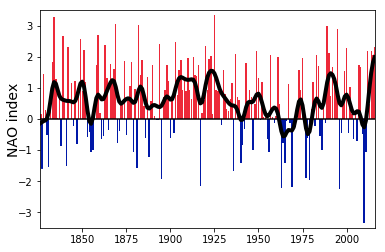

In [12]:
fig,ax=plt.subplots(figsize=(6,4))
#Barchart - all negative values in blue
ax.bar(years[nao_djf<0],nao_djf[nao_djf<0],color='#0018A8',edgecolor='#0018A8')
#Barchart - all positive values in red
ax.bar(years[nao_djf>0],nao_djf[nao_djf>0],color='#ED2939',edgecolor='#ED2939')
#Plot the smoothed field - use a Gaussian filter
ax.plot(years,ndimage.filters.gaussian_filter(nao_djf,2.),c='k',linewidth=4)
#Set limits
ax.set_xlim([np.min(years),np.max(years)])
ax.set_ylim([-3.5,3.5])
#Plot the zero line
ax.axhline(0.,c='k')
#Decrease label pad to make it closer to the axis
ax.set_ylabel('NAO index',labelpad=-3,fontsize=14)
plt.savefig('/homes/dcw32/figures/nao.png',bbox_inches='tight',dpi=200)
plt.show()

## Plot of the Berkeley Earth data

In [13]:
sat_file=Dataset('data/Land_and_Ocean_LatLong1.nc')

In [14]:
#This will raise a warning due to the missing data for early points
sata=sat_file.variables['temperature'][:]
sat_clim=sat_file.variables['climatology'][:]
times=sat_file.variables['time'][:]
lons=sat_file.variables['longitude'][:]
print lons.shape
lats=sat_file.variables['latitude'][:]
print lats.shape
print sata.shape
sata=sata[np.logical_and(times>1950,times<2017),:,:]
times=times[np.logical_and(times>1950,times<2017)]
print sata.shape

(360,)
(180,)
(2012, 180, 360)
(804, 180, 360)


/home/dcw32/.conda/envs/plotting_intro/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  from ipykernel import kernelapp as app
/home/dcw32/.conda/envs/plotting_intro/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  from ipykernel import kernelapp as app
/home/dcw32/.conda/envs/plotting_intro/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/dcw32/.conda/envs/plotting_intro/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  app.launch_new_instance()
/home/dcw32/.conda/envs/plotting_intro/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: WARNING: valid_max not used since it
cann

In [15]:
nyrs=len(times)/12
print nyrs
yrs=np.zeros(nyrs)
annual_data=np.zeros([nyrs,len(lats),len(lons)])
for i in range(nyrs):
    annual_data[i,:,:]=np.mean(sata[12*i:12*i+12,:,:],axis=0)
    yrs[i]=np.mean(times[12*i:12*i+12])
yrs=yrs-0.5
zonal_annual=np.mean(annual_data,axis=2)

67


In [16]:
def gbox_areas(x,y):
# lats x lons
        area=np.zeros([x,y])
        R=6.371E6
        for j in range(x):
                area[j,:]=(R**2)*m.radians(360./y)*(m.sin(m.radians(90.-(j-0.5)*180./(x-1)))-m.sin(m.radians(90.-(180./(x-1))*(j+0.5))))
        return area

In [17]:
areas=gbox_areas(len(lats),len(lons))
gmst=np.zeros(nyrs)
for i in range(nyrs):
    gmst[i]=np.average(annual_data[i,:,:],weights=areas)

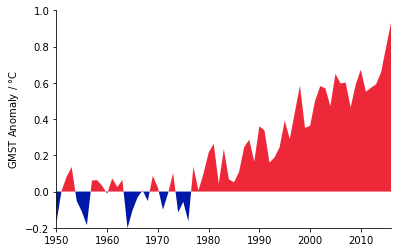

In [18]:
fig,ax=plt.subplots(figsize=(6,4))
ax.fill_between(yrs, 0., gmst,where=gmst>=0,facecolor='#ED2939',interpolate=True)
ax.fill_between(yrs, 0., gmst,where=gmst<0,facecolor='#0018A8',interpolate=True)

#Remove the right and top axes and make the ticks come out of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
#
ax.set_xlim([np.min(yrs),np.max(yrs)])
ax.set_ylim([-0.2,1.0])
ax.set_ylabel(r'GMST Anomaly / $\degree$C')
#ax.plot(yrs,gmst,c='k',linewidth=2)
plt.show()

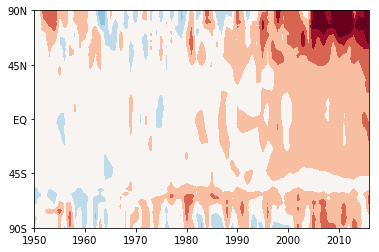

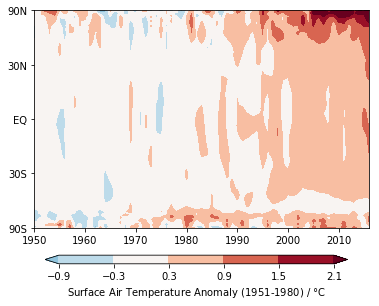

In [19]:
#Contour plot
#This function shifts a colormap with uneven levels 
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)
    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
    newcmap = colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)
    return newcmap
fig=plt.figure()
ax1=fig.add_subplot(111)
cmap=plt.get_cmap('RdBu_r')
levs=[-0.9,-0.3,0.3,0.9,1.5,2.1]
cmap=shiftedColorMap(cmap,0.30)
cf1=ax1.contourf(yrs,lats,np.transpose(zonal_annual),levs,cmap=cmap,extend='both')
ax1.set_yticks([-90,-45,0,45,90])
ax1.set_yticklabels(["90S","45S","EQ","45N","90N"])
fig=plt.figure()
ax2=fig.add_subplot(111)
cf2=ax2.contourf(yrs,np.sin(np.pi*lats/180.),np.transpose(zonal_annual),levs,cmap=cmap,extend='both')
ax2.set_yticks([-1.0,-0.5,0.0,0.5,1.0])
ax2.set_yticklabels(['90S','30S','EQ','30N','90N'])
cbaxes=fig.add_axes([0.15, 0.00, 0.7, 0.03])
cbar=plt.colorbar(cf1,cax=cbaxes,orientation="horizontal")
#cbar=plt.colorbar(cf2,orientation='horizontal',pad=0.15)
cbar.set_label('Surface Air Temperature Anomaly (1951-1980) / $\degree$C',fontsize=10)
plt.show()
#Note that the top plot is equal in latitude
#while the bottom plot is equal in area
#The high latitude warming is more accentuated in the top plot
#If your interest is global mean, the bottom plot is more appropriate
#If you want to highlight the high latitudes, the top plot is more appropriate

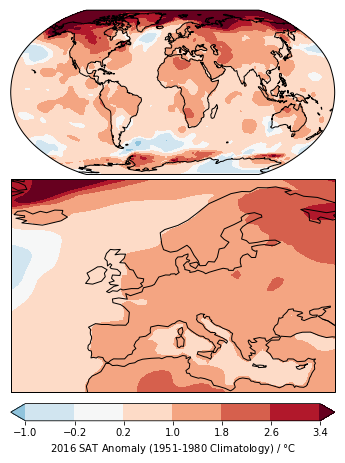

In [43]:
gs=gridspec.GridSpec(2,1)
gs.update(left=0.05, right=0.95, hspace=-0.2)
levs=[10.,20.,30.,40.,50.] # These are the plotting levels
extend='both' # Extend the colorbar above/below? Options are 'max','min','neither','both'
colmap='RdBu_r' # colorscales, google "matplotlib colormaps" for other options
colmap=plt.cm.get_cmap(colmap)
colmap=shiftedColorMap(colmap,0.30)
levs=[-1.0,-0.2,0.2,1.0,1.8,2.6,3.4]
# Want to extract the SST for 2016
sst_2016=annual_data[np.where(yrs==2016)[0][0],:,:]
#Create new figure
fig=plt.figure(figsize=(5,8))
#Use a Robinson projection, draw coastlines
im0=fig.add_subplot(gs[0],projection=ccrs.Robinson(central_longitude=0))
#im0=plt.axes(projection=ccrs.Robinson(central_longitude=0))
im0.coastlines()
im0.set_global()
#im1 is a reduced plot
im1=fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
im1.set_extent([-25,40,30,70])
im1.coastlines()
#
#Trickery to get the colormap to append for the 'both' extension - insert levels above and below
levs2=np.insert(levs,0,levs[0]-1)
levs2=np.append(levs2,levs2[len(levs2)-1]+1)
# This normalises the levels so that if there are large differences between the sizes
# of bins that the colors are uniform
norm=colors.BoundaryNorm(levs2, ncolors=cmap.N, clip=True)
# Filled contour at defined levels
cay=im0.contourf(lons,lats,sst_2016,levs,transform=ccrs.PlateCarree(),cmap=colmap,extend=extend,norm=norm)
caz=im1.contourf(lons,lats,sst_2016,levs,transform=ccrs.PlateCarree(),cmap=colmap,extend=extend,norm=norm)
#Add colorbar, this is a more 'precise' way to add the colorbar by defining a new axis
cbaxes=fig.add_axes([0.05, 0.1, 0.9, 0.03])
cbar=plt.colorbar(cay,cax=cbaxes,orientation="horizontal")
cbar.set_label('2016 SAT Anomaly (1951-1980 Climatology) / $\degree$C')
#plt.suptitle('2016 Surface Temperature Anomaly (from 1951-1980)')
plt.savefig('/homes/dcw32/figures/best.png',bbox_inches='tight',dpi=200)
plt.show()

## Surface Ozone - Trends and Spectral Decomposition

To come!